In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("C:/Users/91939/OneDrive/Desktop/Task-1/Titanic-Dataset.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
print("total number of passengers in the train :",len(data))
print("total number of passengers who survived :",len(data[data['Survived']==1]))
print("total number of passengers who didn't survived :",len(data[data['Survived']==0]))


total number of passengers in the train : 891
total number of passengers who survived : 342
total number of passengers who didn't survived : 549


In [7]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
import numpy as np
print('% of male who survived',100*np.mean(data['Survived'][data['Sex']=='male']))
print('% of female who survived',100*np.mean(data['Survived'][data['Sex']=='female']))

% of male who survived 18.890814558058924
% of female who survived 74.20382165605095


In [10]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [13]:
print('% of who survived first class',100*np.mean(data['Survived'][data['Pclass']==1]))
print('% of who survived third class',100*np.mean(data['Survived'][data['Pclass']==3]))
print('% of who survived second class',100*np.mean(data['Survived'][data['Pclass']==2]))

% of who survived first class 62.96296296296296
% of who survived third class 24.236252545824847
% of who survived second class 47.28260869565217


In [12]:
data[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
data.shape


(891, 12)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
data['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [17]:
data['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [23]:
df2=data.copy()
df2['Sex']=data['Sex'].apply(lambda x:1 if x=='male' else 0)
df2['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [25]:
#DEALING MISSING VALUES
df2=data.copy()
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
int(data['Age'].mean())

29

In [27]:
df2['Age']=df2['Age'].fillna(np.mean(df2['Age']))
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
df2.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [29]:
embark=df2['Embarked'].dropna()

In [30]:
df2[df2['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [31]:
df2['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [32]:
df2['Embarked'].fillna(df2['Embarked'].mode()[0],inplace=True)

In [33]:
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [34]:
df2['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [35]:
df2['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [37]:
df2['Cabin'].fillna(df2['Cabin'].mode()[0],inplace=True)

In [38]:
df2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [39]:
df2.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

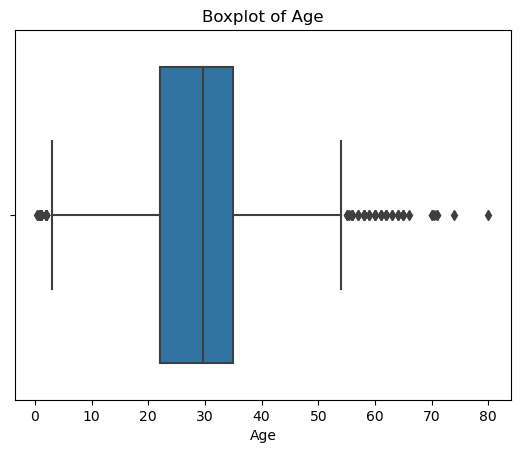

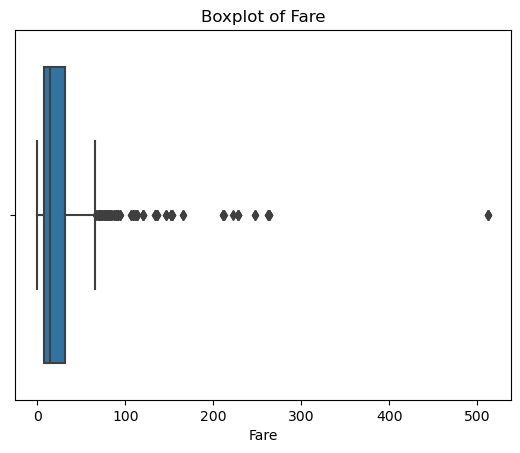

In [67]:
# vizualizing of outliers
sns.boxplot(x=df2['Age'])
plt.title('Boxplot of Age')
plt.show()
# Boxplot for 'fare'
sns.boxplot(x=df2['Fare'])
plt.title('Boxplot of Fare')
plt.show()

In [69]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

# Remove outliers from 'age'
df_cleaned_age = remove_outliers_iqr(df2, 'Age')

# Remove outliers from 'fare'
df_cleaned_fare = remove_outliers_iqr(df_cleaned_age, 'Fare')


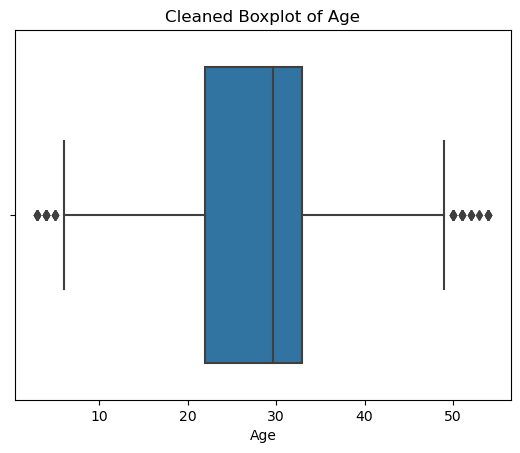

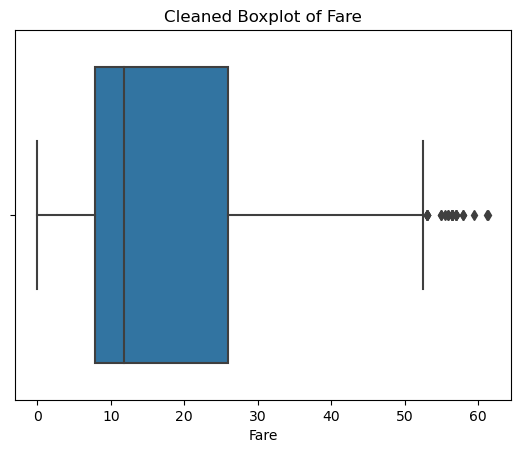

In [71]:
# After removing outliers of age
sns.boxplot(x=df_cleaned_fare['Age'])
plt.title('Cleaned Boxplot of Age')
plt.show()

#After removing ouliers of fare
sns.boxplot(x=df_cleaned_fare['Fare'])
plt.title('Cleaned Boxplot of Fare')
plt.show()

<AxesSubplot:xlabel='Sex'>

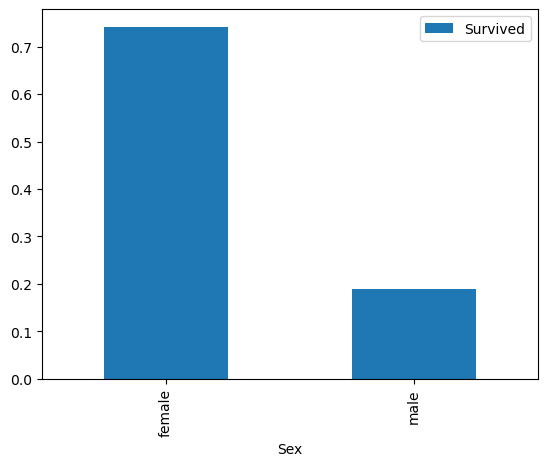

In [72]:
survived_by_sex=df2[['Sex','Survived']].groupby('Sex').mean()
type(survived_by_sex)
survived_by_sex.plot.bar()

<AxesSubplot:xlabel='Pclass'>

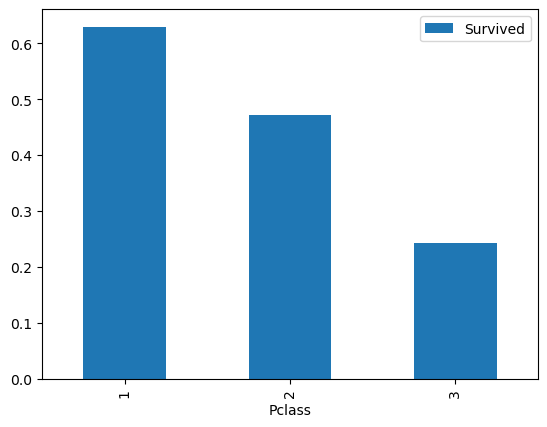

In [73]:
df2[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

<AxesSubplot:xlabel='Pclass,Sex'>

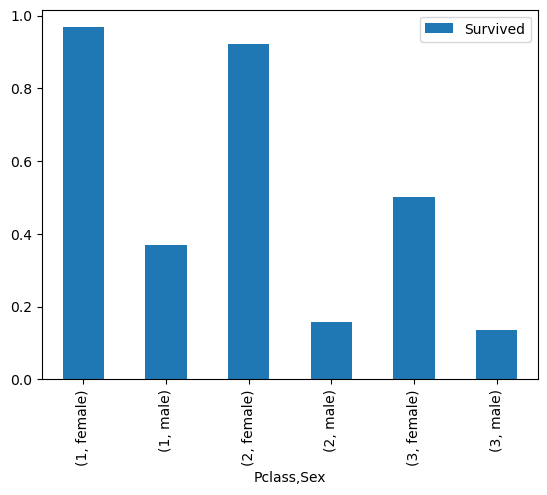

In [74]:
data[['Pclass','Survived','Sex']].groupby(['Pclass','Sex']).mean().plot.bar()

C:\Users\91939\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91939\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Age'>

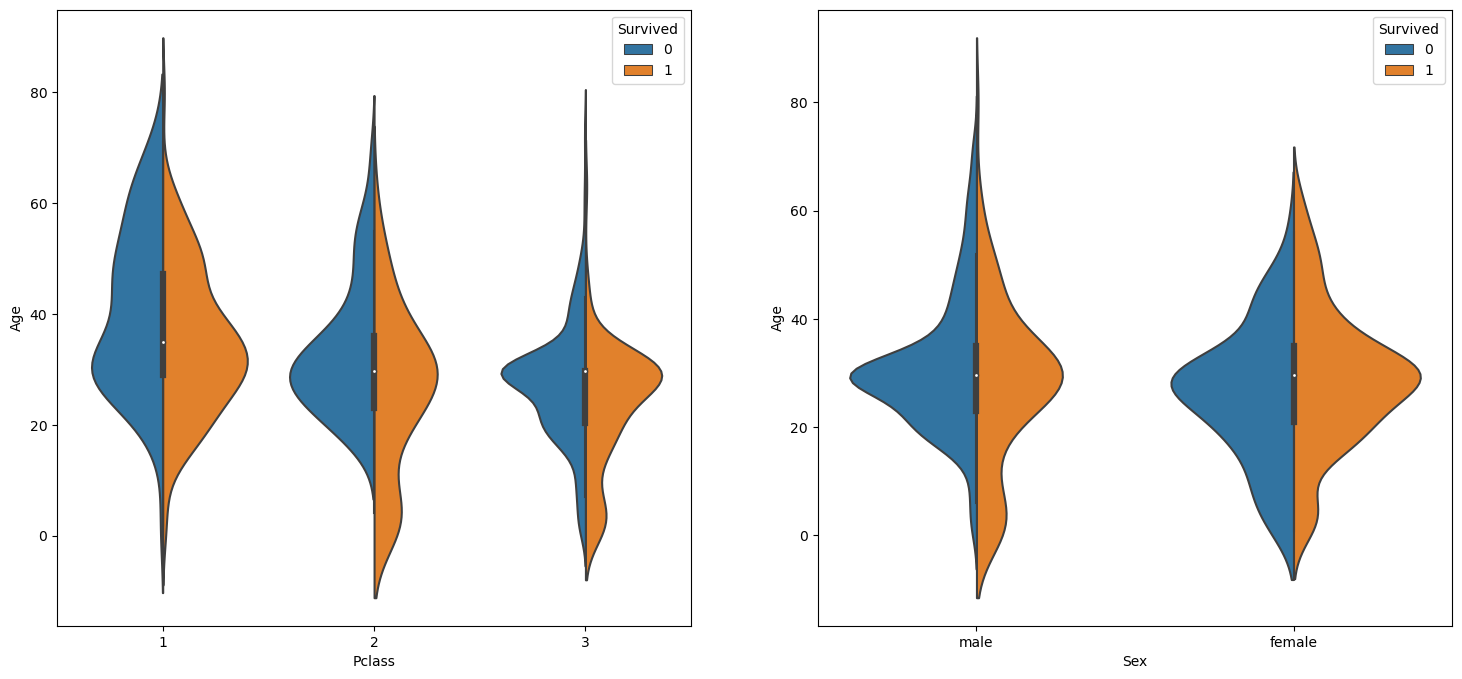

In [75]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',data=df2,split=True,ax=ax[0])
sns.violinplot('Sex','Age',hue='Survived',data=df2,split=True,ax=ax[1])


<AxesSubplot:>

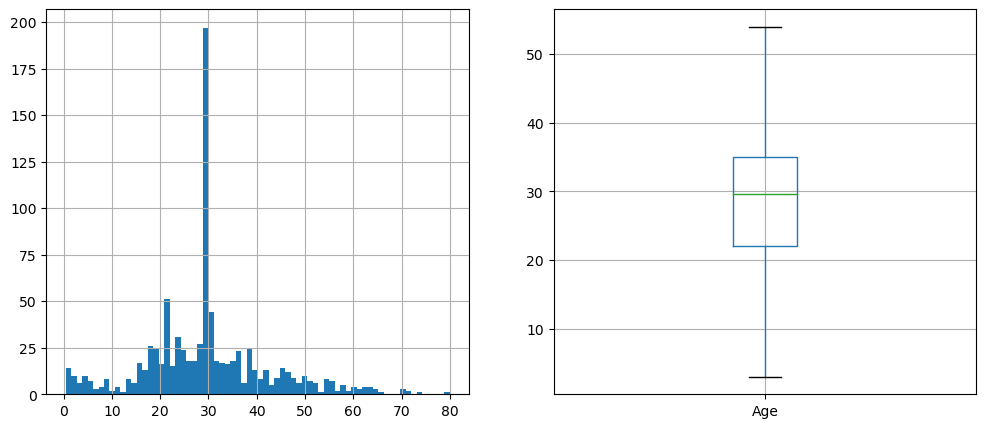

In [79]:
plt.figure(figsize=(12,5))
plt.subplot(121)
df2['Age'].hist(bins=70)
plt.subplot(122)
df2.boxplot(column='Age',showfliers=False)

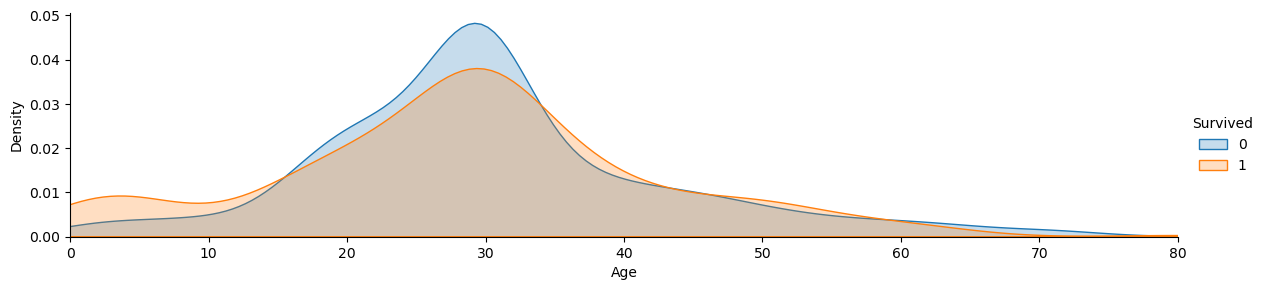

In [77]:
facet=sns.FacetGrid(df2,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,df2['Age'].max()))
facet.add_legend()

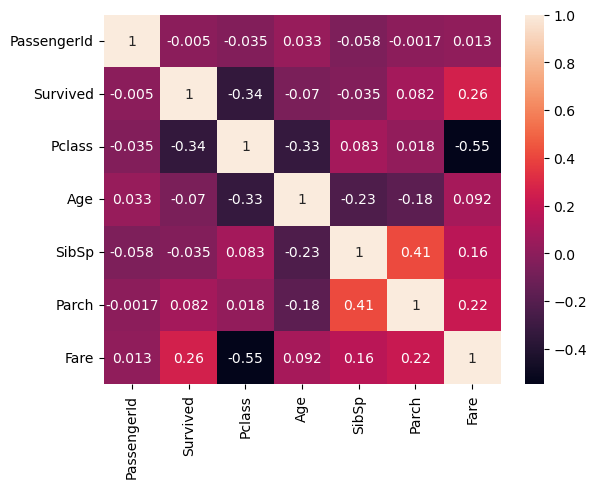

In [78]:
#heatmap for corrleation between feature
sns.heatmap(df2.corr(),annot=True)
plt.show()